# Model Comparison
## Find the Best Model

This notebook loads all of the comparison csvs generated by `compare_models.py` that is run five times per day on a random subset of eight subreddits.

Examples of different ways to group classifiers and sort based on desired metric.

Each model also has a `best_params` column that gives the best parameters for that model on each run.
There is a dictionary that includes the estimator, parameter, value, and count of times that value was chosen as the best.
Also included is a function to plot the best parameter values.

In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from glob import glob
from collections import Counter, namedtuple
import CONFIG
from pathlib import Path
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
!pwd

/home/datapointchris/github/reddit_nlp


In [3]:
reports = CONFIG.MODEL_COMPARE_DIR.glob('*.csv')

In [4]:
df = pd.DataFrame()

In [5]:
for report in reports:
    data = pd.read_csv(report)
    df = df.append(data)
len(df)    

377

In [14]:
df.drop(columns='Unnamed: 0', inplace=True)

In [15]:
columns_of_interest = ['preprocessor','estimator','best_test_score', 'roc_auc', 'fit_time_seconds','time_weighted_score']

In [16]:
df.groupby(by='estimator')[columns_of_interest].agg(
    np.mean).sort_values(by='best_test_score', ascending=False)

,best_test_score,roc_auc,fit_time_seconds,time_weighted_score
estimator,,,,
Linear SVC,0.6974,0.8921,0.3327,1970.7876
Stochastic Gradient Descent Classifier,0.6973,0.8921,0.4227,1639.6683
Multinomial Bayes Classifier,0.6954,0.9107,0.1899,3342.9975
Logistic Regression,0.6904,0.9075,0.7811,1029.1283
Passive Agressive Classifier,0.6838,0.8921,0.7366,1042.2032
Support Vector Classifier,0.6834,0.9107,7.1122,99.4669
Bagging Classifier Logistic Regression,0.6781,0.9105,1976.7954,0.4880
Extra Trees Classifier,0.6634,0.8921,55.0156,13.4602
XGBoost Classifier,0.6528,0.8891,130.3126,9.1807


In [17]:
df.groupby(by='estimator')[columns_of_interest].agg(
    np.mean).sort_values(by='roc_auc', ascending=False)

,best_test_score,roc_auc,fit_time_seconds,time_weighted_score
estimator,,,,
Multinomial Bayes Classifier,0.6954,0.9107,0.1899,3342.9975
Support Vector Classifier,0.6834,0.9107,7.1122,99.4669
Bagging Classifier Logistic Regression,0.6781,0.9105,1976.7954,0.4880
Logistic Regression,0.6904,0.9075,0.7811,1029.1283
Random Forest,0.6440,0.8936,2.9566,226.5585
Extra Trees Classifier,0.6634,0.8921,55.0156,13.4602
Linear SVC,0.6974,0.8921,0.3327,1970.7876
Passive Agressive Classifier,0.6838,0.8921,0.7366,1042.2032
Stochastic Gradient Descent Classifier,0.6973,0.8921,0.4227,1639.6683


In [18]:
df.groupby(by='estimator')[columns_of_interest].agg(
    np.mean).sort_values(by='time_weighted_score', ascending=False)

,best_test_score,roc_auc,fit_time_seconds,time_weighted_score
estimator,,,,
Multinomial Bayes Classifier,0.6954,0.9107,0.1899,3342.9975
Linear SVC,0.6974,0.8921,0.3327,1970.7876
Stochastic Gradient Descent Classifier,0.6973,0.8921,0.4227,1639.6683
Passive Agressive Classifier,0.6838,0.8921,0.7366,1042.2032
Logistic Regression,0.6904,0.9075,0.7811,1029.1283
Random Forest,0.6440,0.8936,2.9566,226.5585
K Nearest Neighbors,0.3247,0.6203,0.2609,168.4131
Support Vector Classifier,0.6834,0.9107,7.1122,99.4669
AdaBoost Classifier,0.4982,0.7468,5.7116,83.4195


# Best Params

In [19]:
params_tuple_list = []
for param_grid in df.best_params:
    for key, value in eval(param_grid).items():
        estimator, parameter = key.split('__')
        params_tuple_list.append((estimator, parameter, value))
        
counted = dict(Counter(params_tuple_list))
counted

{('xgbclassifier', 'n_estimators', 100): 2,
 ('xgbclassifier', 'max_depth', 20): 2,
 ('xgbclassifier', 'hidden_layer_sizes', 50): 3,
 ('tfidfvectorizer', 'use_idf', False): 57,
 ('tfidfvectorizer', 'strip_accents', 'ascii'): 37,
 ('tfidfvectorizer', 'norm', 'l2'): 130,
 ('tfidfvectorizer', 'ngram_range', (1, 1)): 83,
 ('tfidfvectorizer', 'min_df', 2): 41,
 ('tfidfvectorizer', 'max_features', 7000): 68,
 ('tfidfvectorizer', 'max_df', 0.895): 28,
 ('tfidfvectorizer', 'use_idf', True): 73,
 ('tfidfvectorizer', 'strip_accents', None): 44,
 ('tfidfvectorizer', 'min_df', 1): 89,
 ('tfidfvectorizer', 'max_df', 0.9425): 30,
 ('logisticregression', 'solver', 'lbfgs'): 7,
 ('logisticregression', 'fit_intercept', False): 10,
 ('logisticregression', 'C', 0.99): 9,
 ('tfidfvectorizer', 'strip_accents', 'unicode'): 49,
 ('tfidfvectorizer', 'max_df', 0.99): 30,
 ('randomforestclassifier', 'n_estimators', 300): 3,
 ('randomforestclassifier', 'min_samples_split', 0.1): 6,
 ('randomforestclassifier', 'm

In [20]:
def plot_best_params(estimator, parameter=None, cmap='Blues_r'):
    
    if parameter is None:
        string_keys = [(f'{key[1]}: {key[2]}') for key, _ in sorted(counted.items(), key=lambda item: item[1], reverse=True) if key[0] == estimator]
        string_values = [value for key, value in sorted(counted.items(), key=lambda item: item[1], reverse=True) if key[0] == estimator]
        
        plt.figure(figsize=(2 * len(string_keys), 2 * len(string_keys)))
        plt.title(f'{estimator.upper()}')
        
        sns.barplot(y=string_keys, x=string_values, orient='h', palette=cmap);
    
    else:
        string_keys = [(f'{key[1]}: {key[2]}') for key, _ in sorted(counted.items(), key=lambda item: item[1], reverse=True) if key[0] == estimator and key[1] == parameter]
        string_values = [value for key, value in sorted(counted.items(), key=lambda item: item[1], reverse=True) if key[0] == estimator and key[1] == parameter]
        
        plt.figure(figsize=(2 * len(string_keys), 2 * len(string_keys)))
        plt.title(f'{estimator.upper()} {parameter.upper()}')

        sns.barplot(y=string_keys, x=string_values, orient='h', palette=cmap);



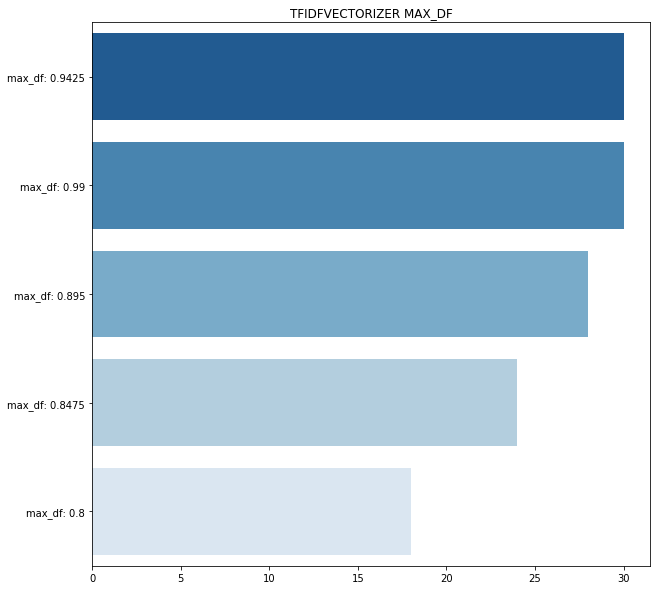

In [21]:
plot_best_params('tfidfvectorizer', 'max_df')

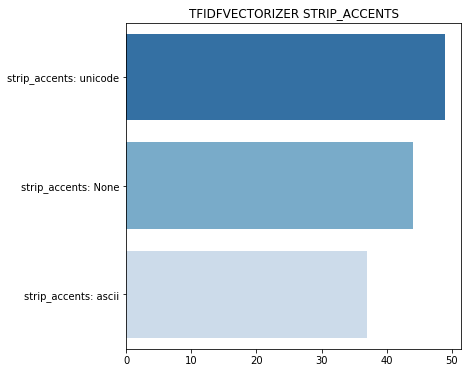

In [22]:
plot_best_params('tfidfvectorizer', 'strip_accents')

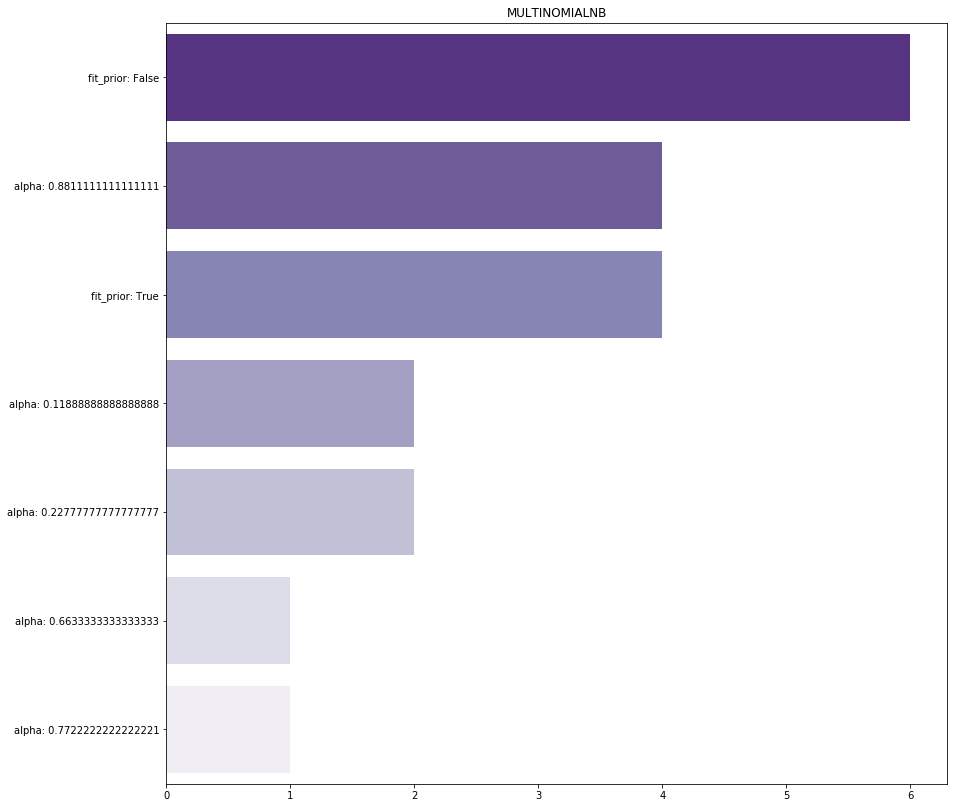

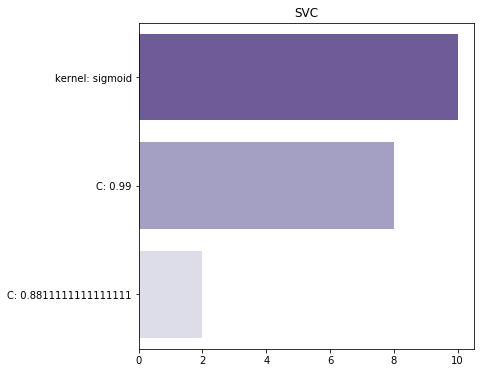

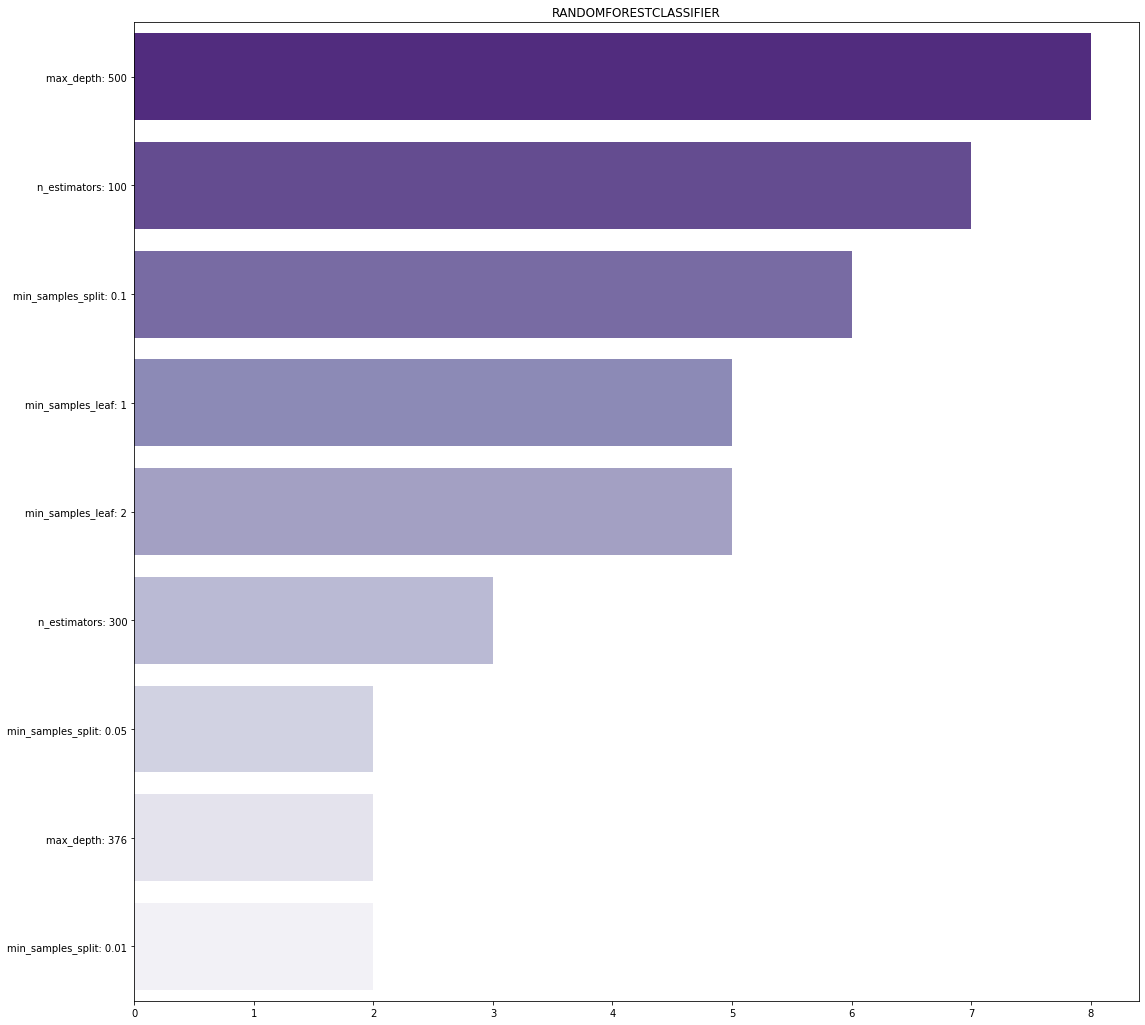

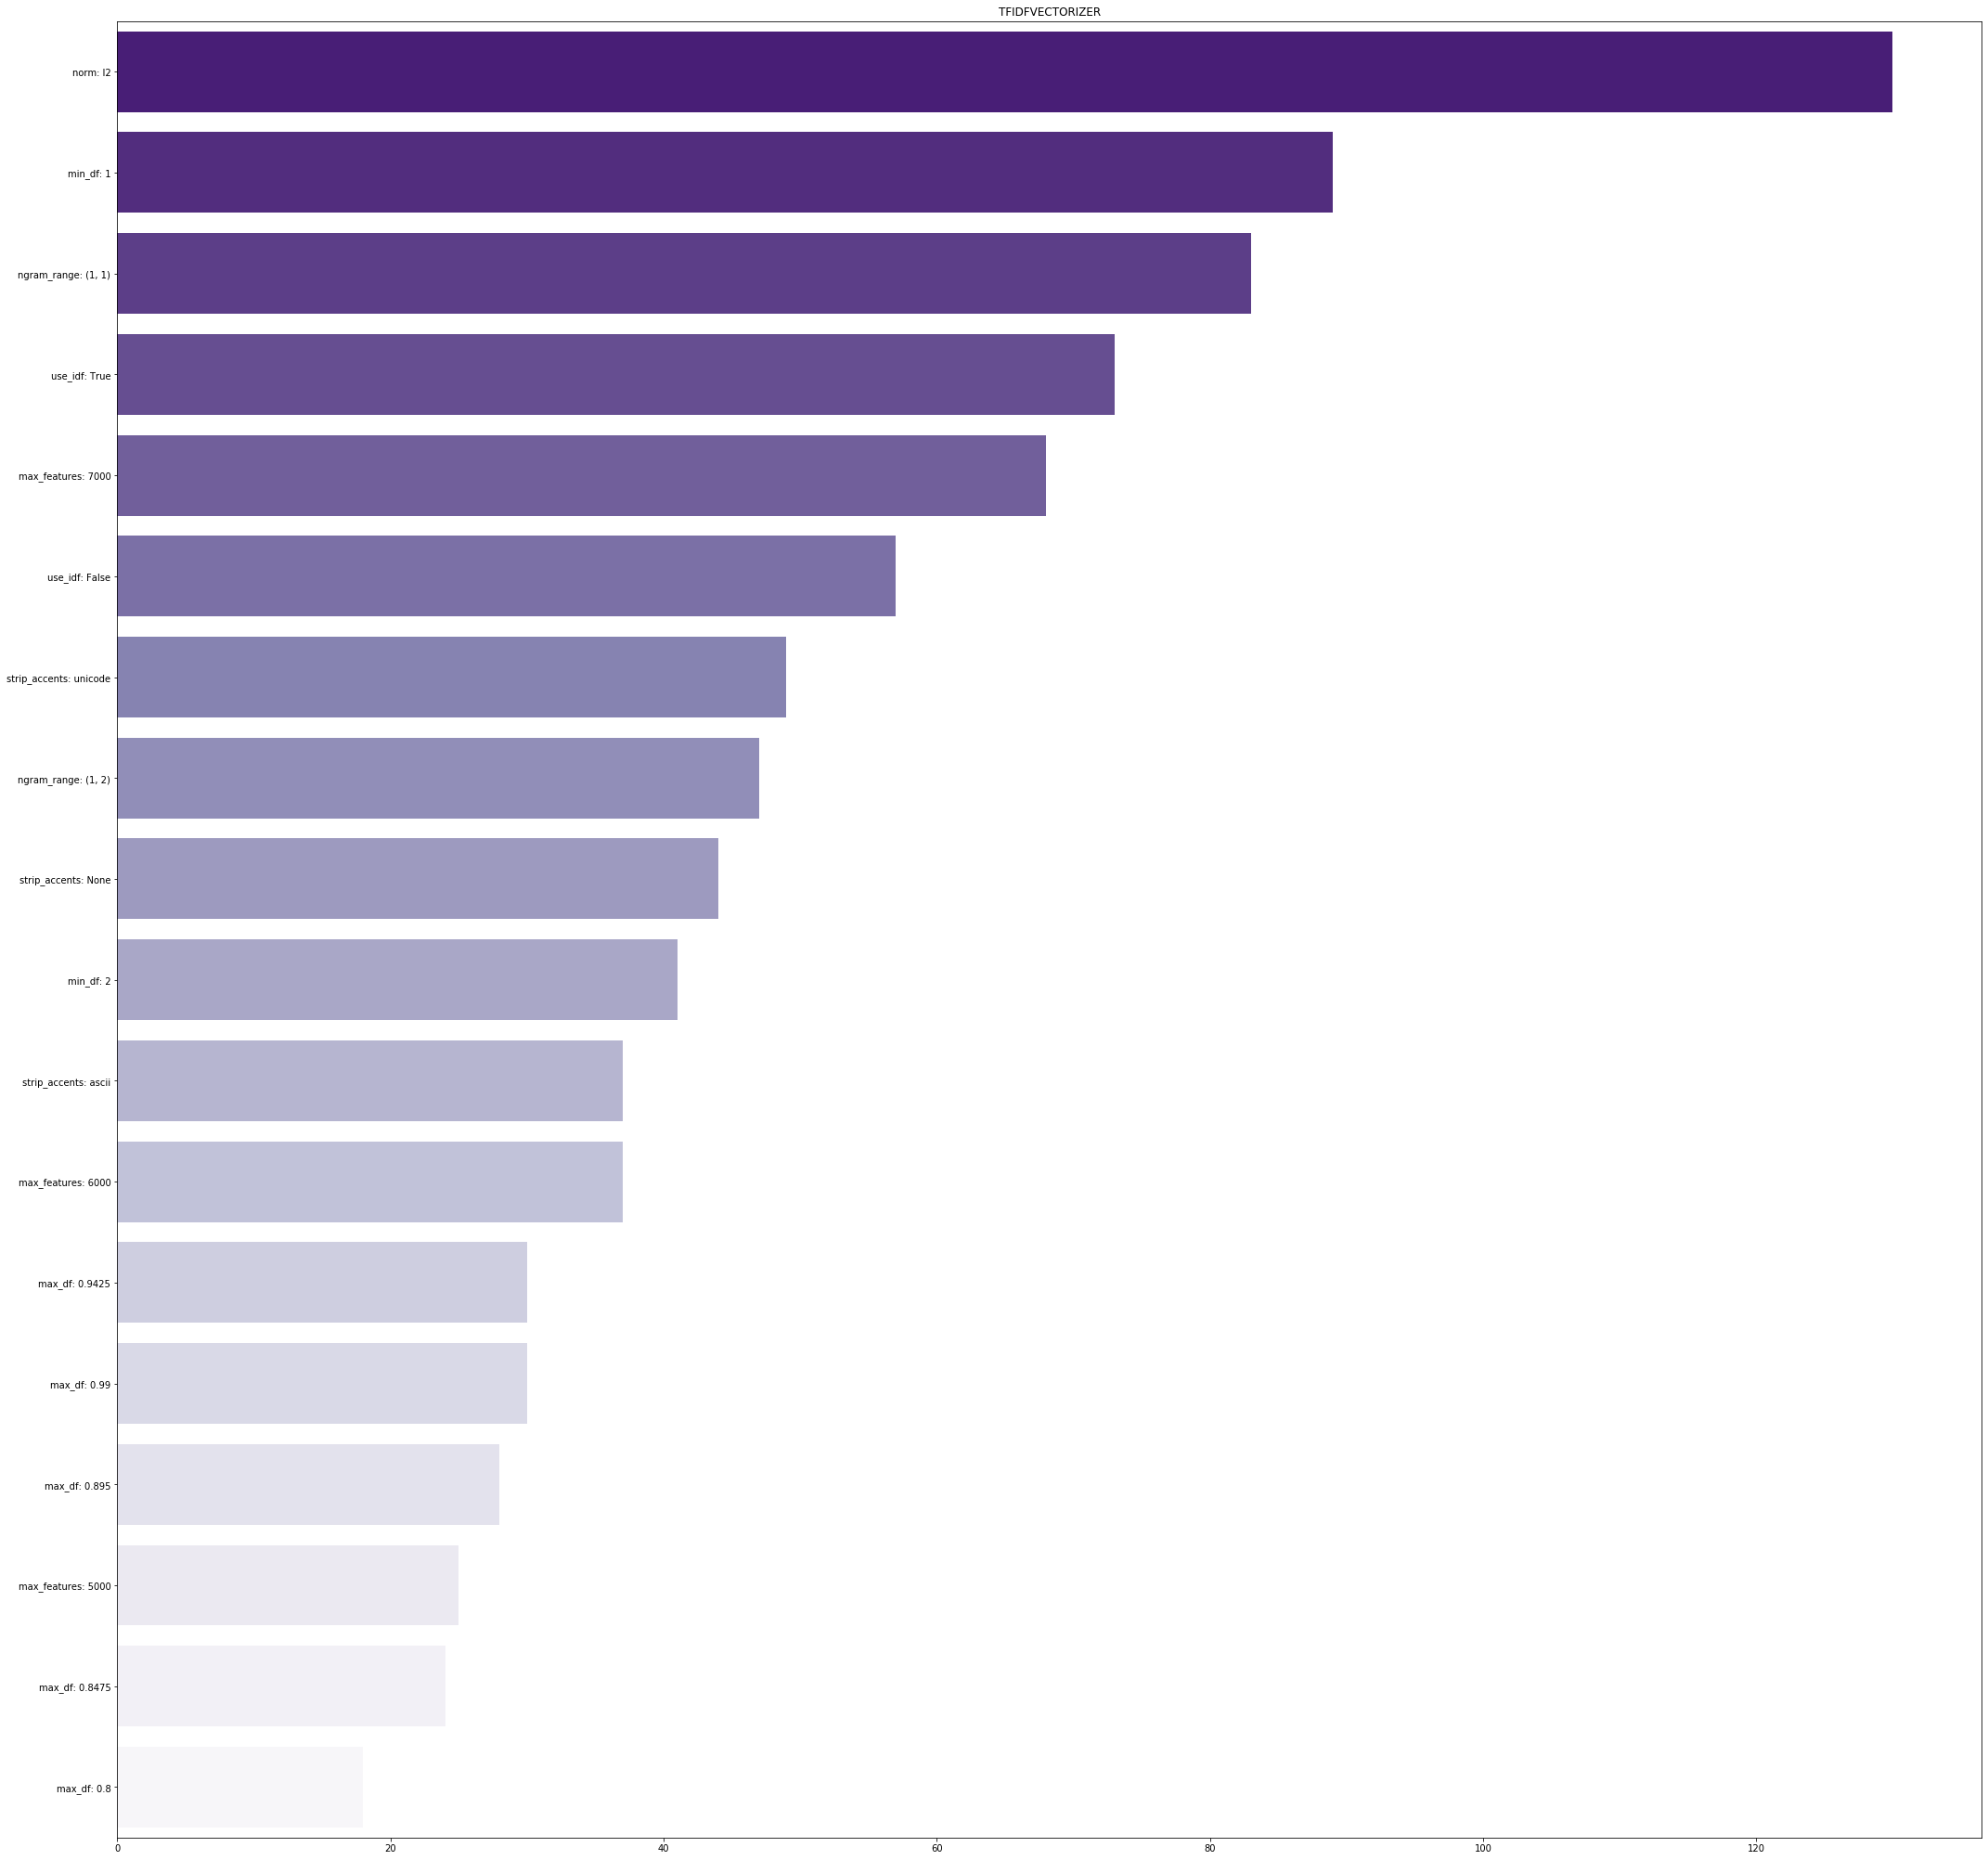

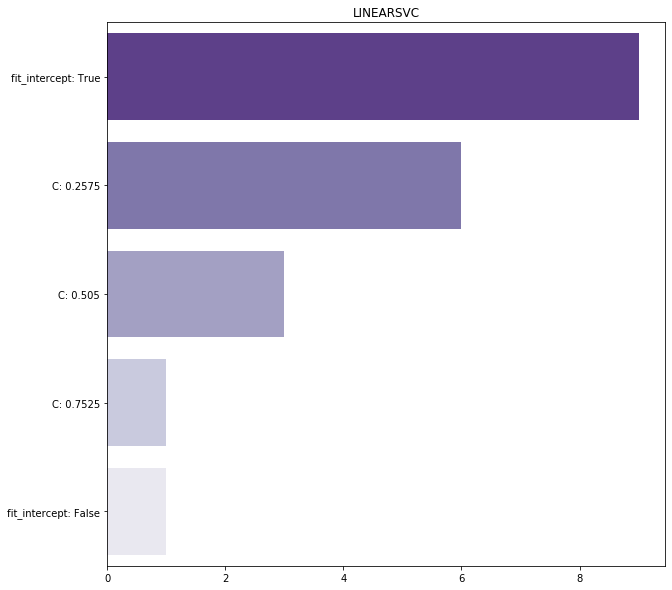

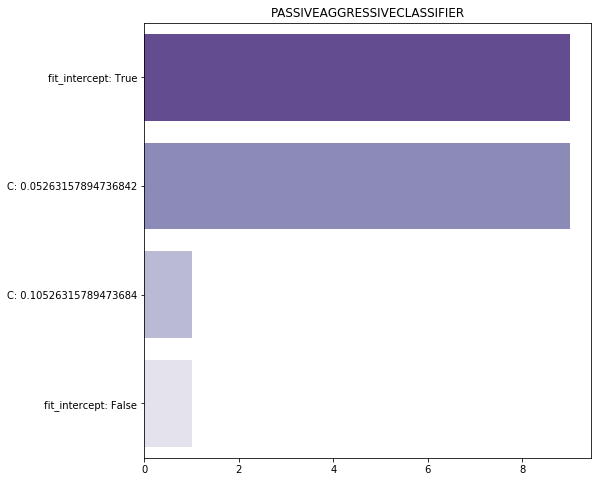

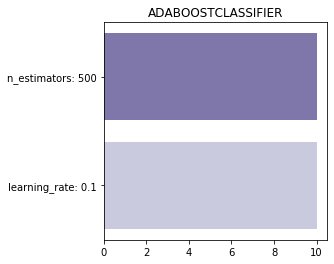

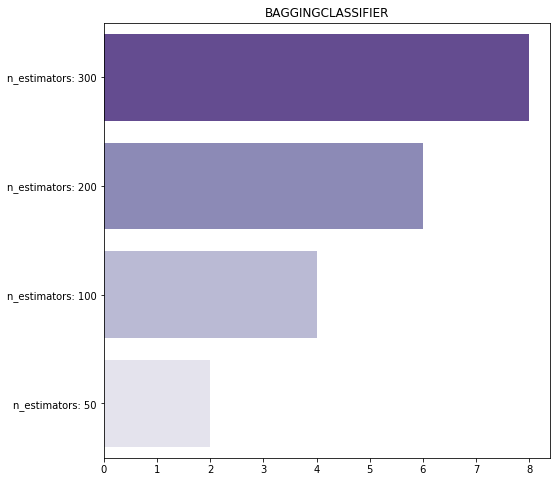

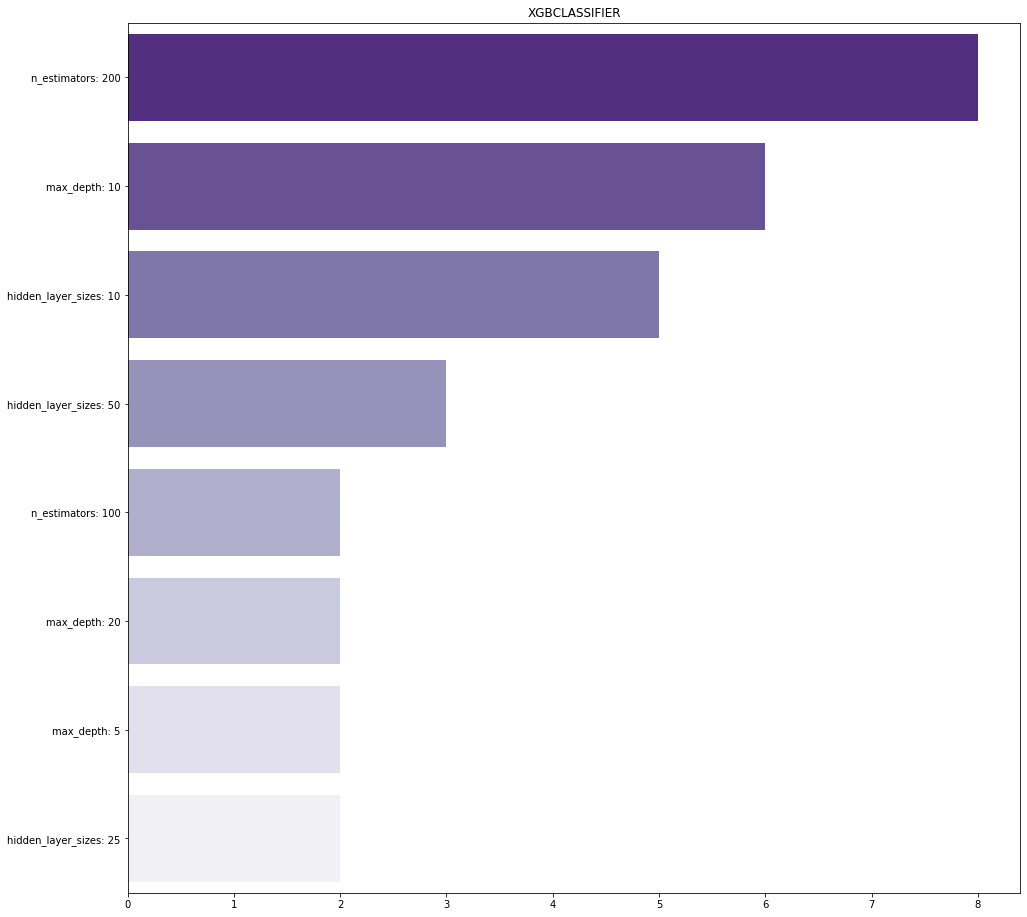

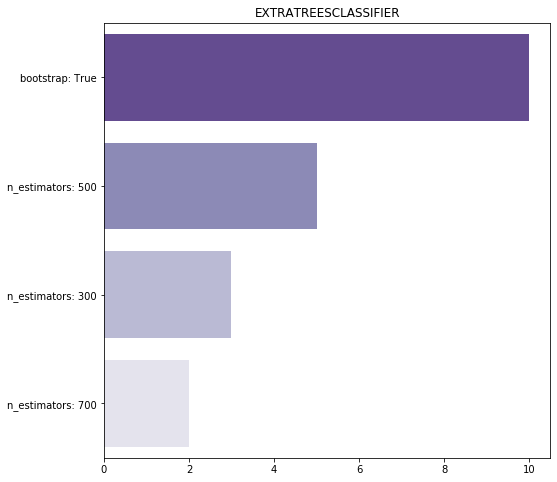

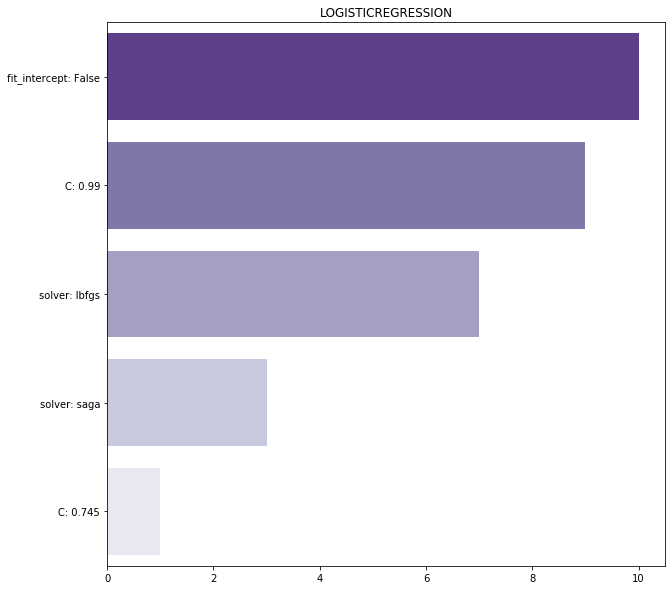

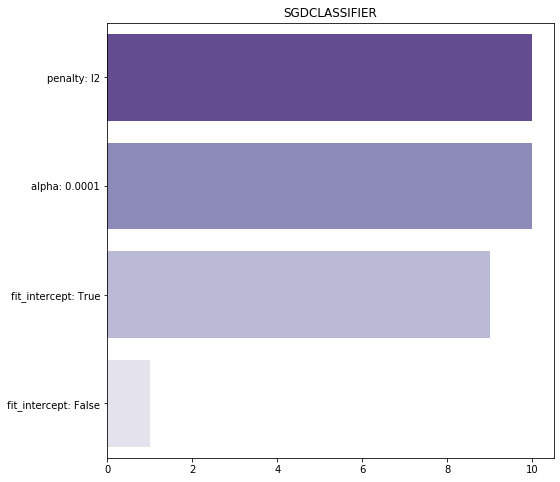

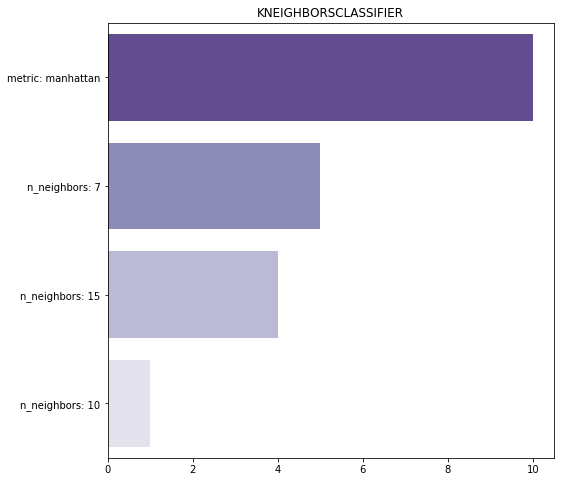

In [23]:
estimators = set(estimator[0] for estimator in counted.keys())
for estimator in estimators:
    plot_best_params(estimator, cmap='Purples_r')